In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt

In [14]:
points_list=[(0,1),(1,5),(5,6),(5,4),(1,2),(2,3),(2,7)]

In [15]:
goal=7
import networkx as nx

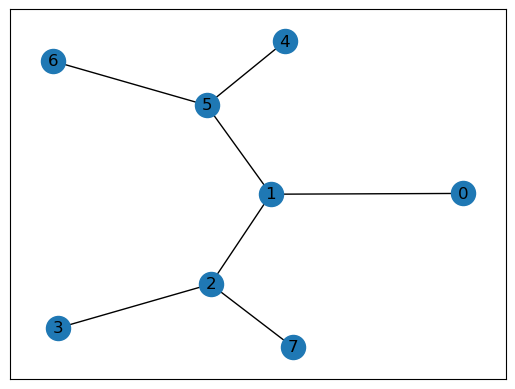

In [16]:
G=nx.Graph()
G.add_edges_from(points_list)
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [17]:
MATRIX_SIZE=8
R=np.matrix(np.ones(shape=(MATRIX_SIZE,MATRIX_SIZE)))
R*=-1

In [18]:
for point in points_list:
    print(point)
    if point[1]==goal:
        R[point]=100
    else:
        R[point]=0
    if point[0]==goal:
        R[point[::-1]]=100
    else:
        R[point[::-1]]=0
R[goal,goal]=100

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [19]:
Q=np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
gamma=0.8
initial_state=1
def available_actions(state):
    current_state_row=R[state,]
    av_act=np.where(current_state_row>=0)[1]
    return av_act
available_act=available_actions(initial_state)
def sample_next_action(available_actions_range):
    next_action=int(np.random.choice(available_act,1))
    return next_action

In [20]:
action=sample_next_action(available_act)
def update(current_state,action,gamma):
    max_index=np.where(Q[action,]==np.max(Q[action,]))[1]
    if max_index.shape[0]>1:
        max_index=int(np.random.choice(max_index,size=1))
    else:
        max_index=int(max_index)
    max_value=Q[action,max_index]
    Q[current_state,action]=R[current_state,action]+gamma*max_value
    print('max_value',R[current_state,action]+gamma*max_value)
    if(np.max(Q)>0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)
update(initial_state,action,gamma)

max_value 0.0


0

In [21]:
scores=[]
for i in range(700):
    current_state=np.random.randint(0,int(Q.shape[0]))
    available_act=available_actions(current_state)
    action=sample_next_action(available_act)
    score=update(current_state,action,gamma)
    scores.append(score)
    print('score:',str(score))
print("trained q matrix:")
print(Q/np.max(Q)*100)
current_state=0
steps=[current_state]

max_value 0.0
score: 0
max_value 0.0
score: 0
max_value 0.0
score: 0
max_value 100.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 180.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 0.0
score: 100.0
max_value 244.0
score: 173.77049180327867
max_value 0.0
score: 173.77049180327867
max_value 195.20000000000002
score: 253.77049180327867
max_value 0.0
score: 253.77049180327867
max_value 195.20000000000002
score: 333.7704918032787
max_value 156.16000000000003
score: 397.7704918032787
max_value 0.0
score: 397.7704918032787
max_value 0.0
score: 397.7704918032787
max_value 0.0
score: 397.7704918032787
max_value 0.0
score: 397.7704918032787
max_value 0.0
score: 397.7704918032787
max_value 0.0
s

most efficient path:
[0, 1, 2, 7]


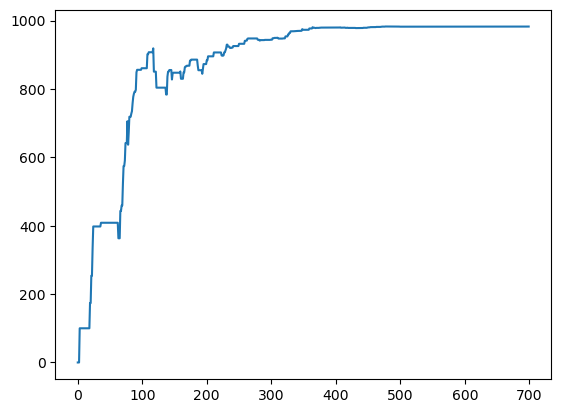

In [22]:
while current_state!=7:
    next_step_index=np.where(Q[current_state,]==np.max(Q[current_state,]))[1]
    if next_step_index.shape[0]>1:
        next_step_index=int(np.random.choice(next_step_index,size=1))
    else:
        next_step_index=int(next_step_index)
    steps.append(next_step_index)
    current_state=next_step_index
print('most efficient path:')
print(steps)
plt.plot(scores)
plt.show()